In [1]:
import numpy as numpy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importing the data 

df=pd.read_csv("Uber Request Data.csv")

In [3]:
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47


In [4]:
df.columns

Index(['Request id', 'Pickup point', 'Driver id', 'Status',
       'Request timestamp', 'Drop timestamp'],
      dtype='object')

In [5]:
# Checking the datatype
df.dtypes

Request id             int64
Pickup point          object
Driver id            float64
Status                object
Request timestamp     object
Drop timestamp        object
dtype: object

In [6]:
# Now converting the timestamp datatype into datetime

df["Request timestamp"]=pd.to_datetime(df["Request timestamp"])

In [7]:
df["Drop timestamp"]=pd.to_datetime(df["Drop timestamp"])

In [8]:
# Againg checking the datatypes

df.dtypes

Request id                    int64
Pickup point                 object
Driver id                   float64
Status                       object
Request timestamp    datetime64[ns]
Drop timestamp       datetime64[ns]
dtype: object

In [9]:
# Now converting the timestamp into hours

df["Request Hours"]=df["Request timestamp"].dt.hour

In [10]:
df["Drop Hours"]=df["Drop timestamp"].dt.hour

In [11]:
# Now checking the table again

df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request Hours,Drop Hours
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,11,13.0
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,17,18.0
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00,9,9.0
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00,21,22.0
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8,9.0


In [12]:
df.dtypes

Request id                    int64
Pickup point                 object
Driver id                   float64
Status                       object
Request timestamp    datetime64[ns]
Drop timestamp       datetime64[ns]
Request Hours                 int64
Drop Hours                  float64
dtype: object

In [13]:
# Now droping the Request timestamp and Drop timestamp

df.drop(["Request timestamp", "Drop timestamp"] , axis=1 , inplace=True)

In [14]:
# Again checking the table

df.head(10)

,Request id,Pickup point,Driver id,Status,Request Hours,Drop Hours
0,619,Airport,1.0,Trip Completed,11,13.0
1,867,Airport,1.0,Trip Completed,17,18.0
2,1807,City,1.0,Trip Completed,9,9.0
3,2532,Airport,1.0,Trip Completed,21,22.0
4,3112,City,1.0,Trip Completed,8,9.0
5,3879,Airport,1.0,Trip Completed,21,22.0
6,4270,Airport,1.0,Trip Completed,6,7.0
7,5510,Airport,1.0,Trip Completed,5,6.0
8,6248,City,1.0,Trip Completed,17,18.0
9,267,City,2.0,Trip Completed,6,7.0


In [15]:
# Now checking the null values

df.isnull().sum()

Request id          0
Pickup point        0
Driver id        2650
Status              0
Request Hours       0
Drop Hours       3914
dtype: int64

In [16]:
# Now checking the percentage of null values

df.isnull().sum()*100/df.shape[0] # 0 means you want value from 0

Request id        0.000000
Pickup point      0.000000
Driver id        39.288362
Status            0.000000
Request Hours     0.000000
Drop Hours       58.028169
dtype: float64

<AxesSubplot:xlabel='Request Hours', ylabel='count'>

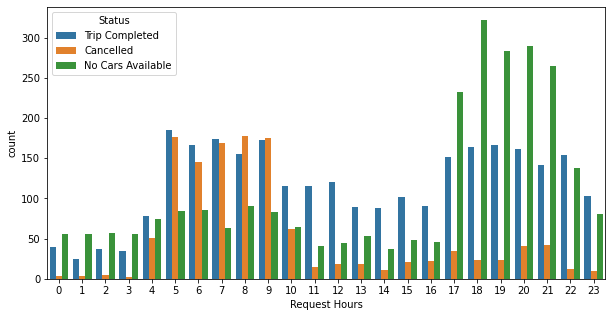

In [17]:
# Now visualizing the Status of the cab with the help of request hours
plt.figure(figsize=(10,5))
sns.countplot(data=df,x='Request Hours',hue='Status')


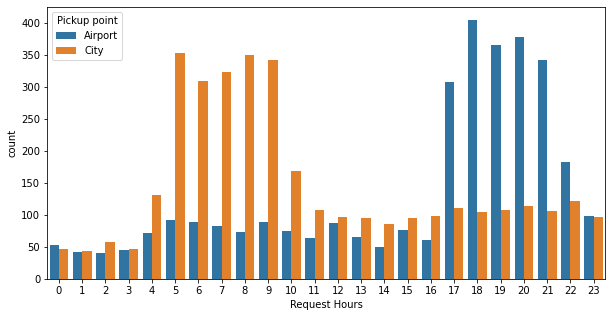

In [18]:
# Now we are going to visualizing demand at the pickup point as per the time
plt.figure(figsize=(10,5))
sns.countplot(data=df,x='Request Hours',hue='Pickup point')
plt.show()

In [19]:
# Now we are creatig an another column neams as Time Slot

df["Time Slot"]=0

'''
Categories of Time Slot will be as follow 

Before 5am = Early Morning

Between 5am to 12pm = Morning

Between 12pm to 5pm = Afternoon

Between 5pm to 10pm = Evening

After 10pm = Night
'''

'\nCategories of Time Slot will be as follow \n\nBefore 5am = Early Morning\n\nBetween 5am to 12pm = Morning\n\nBetween 12pm to 5pm = Afternoon\n\nBetween 5pm to 10pm = Evening\n\nAfter 10pm = Night\n'

In [20]:
# Checking the Time slot column is added or not

df.head()

,Request id,Pickup point,Driver id,Status,Request Hours,Drop Hours,Time Slot
0,619,Airport,1.0,Trip Completed,11,13.0,0
1,867,Airport,1.0,Trip Completed,17,18.0,0
2,1807,City,1.0,Trip Completed,9,9.0,0
3,2532,Airport,1.0,Trip Completed,21,22.0,0
4,3112,City,1.0,Trip Completed,8,9.0,0


In [21]:
# Now adding the Categories in Time Slot Column with the help of for loop and elif satement
j=0
for i in df["Request Hours"]:
  if df.iloc[j,4]<5:
    df.iloc[j,6]="Early Morning"
  elif 5<=df.iloc[j,4]<10:
    df.iloc[j,6]="Morning"
  elif 10<=df.iloc[j,4]<17:
    df.iloc[j,6]="Afternoon"
  elif 17<=df.iloc[j,4]<22:
    df.iloc[j,6]="Evening"
  else : df.iloc[j,6]="Night"
  j=j+1


In [22]:
# Now checking the table again
df.head()

,Request id,Pickup point,Driver id,Status,Request Hours,Drop Hours,Time Slot
0,619,Airport,1.0,Trip Completed,11,13.0,Afternoon
1,867,Airport,1.0,Trip Completed,17,18.0,Evening
2,1807,City,1.0,Trip Completed,9,9.0,Morning
3,2532,Airport,1.0,Trip Completed,21,22.0,Evening
4,3112,City,1.0,Trip Completed,8,9.0,Morning


In [23]:
df["Time Slot"].value_counts()

Evening          2342
Morning          2103
Afternoon        1224
Early Morning     578
Night             498
Name: Time Slot, dtype: int64

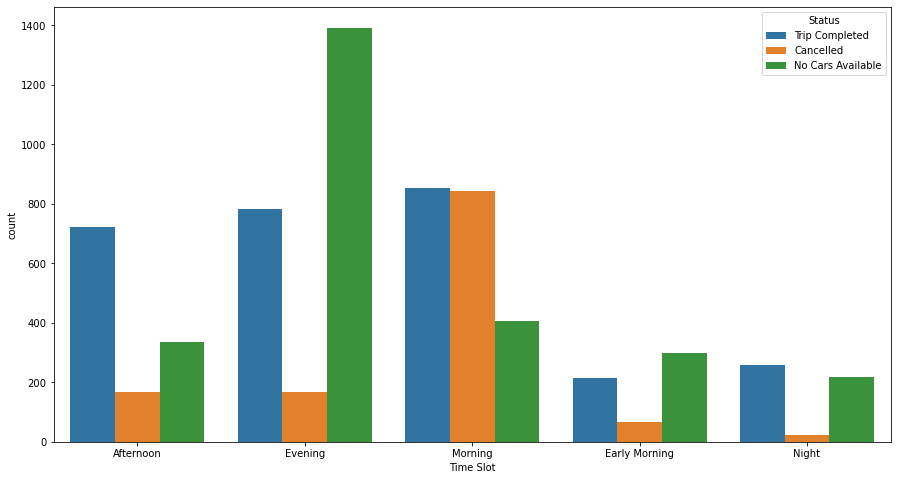

In [24]:
# Now we will Visualize the Status of the cab as per the Time Slot
plt.figure(figsize=(15,8))
sns.countplot(data=df,x="Time Slot",hue="Status")
plt.show()


In [25]:
# Now we are going to check the Status of the cab of Morning time
Morning_Time=df[df["Time Slot"]=="Morning"]

<AxesSubplot:xlabel='Pickup point', ylabel='count'>

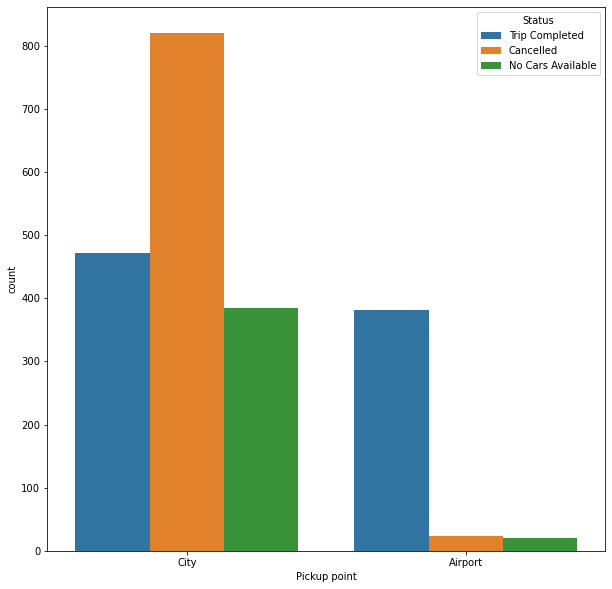

In [26]:
plt.figure(figsize=(10,10))
sns.countplot(data=Morning_Time,x='Pickup point',hue="Status")

In [27]:
# Now we will find how many cab were cancelled in the Morning Time as per pick up location

# Pick up Location = City

city_morning_cancelled=Morning_Time.loc[(Morning_Time["Pickup point"]=="City") & (Morning_Time["Status"]=="Cancelled")]

len(city_morning_cancelled)


820

In [28]:
# Pick up Location = Airport

airport_morning_cancelled=Morning_Time.loc[(Morning_Time["Pickup point"]=="Airport") & (Morning_Time["Status"]=="Cancelled")]

len(airport_morning_cancelled)

23

In [29]:
# Now we will find out status of all cab in the morning slot

# PICKUP = Airport

status_morning_total=Morning_Time.loc[(Morning_Time["Pickup point"]=="Airport")]

len(status_morning_total)


426

In [30]:
Morning_Time[(Morning_Time["Pickup point"]=="Airport") & (Morning_Time["Status"]=="Cancelled")].shape[0]



23

In [31]:
# Shape[0] means ir will give dimentions of row

# Shape[1] means it will give you dimenstion of coloumns

In [32]:
Morning_Time[(Morning_Time["Pickup point"]=="Airport")&(Morning_Time["Status"]=='No Cars Available')].shape[0]

21

In [33]:
# Now we will find out status of all cab in the morning slot

# PICKUP = City

status_morning_total=Morning_Time.loc[(Morning_Time["Pickup point"]=="City")]\

len(status_morning_total)

1677

In [34]:
Morning_Time[(Morning_Time["Pickup point"]=="City")&(Morning_Time["Status"]=="Trip Completed")].shape[0]

472

In [35]:
Morning_Time[(Morning_Time["Pickup point"]=="City")&(Morning_Time["Status"]=="Cancelled")].shape[0]

820

In [36]:
Morning_Time[(Morning_Time["Pickup point"]=="City")&(Morning_Time["Status"]=="No Cars Available")].shape[0]

385

In [37]:
### EVENING TIME

# Now we are going to check the Status of the cab of Evening time
Evening_Time=df[df["Time Slot"]=="Evening"]

Evening_Time.head()

,Request id,Pickup point,Driver id,Status,Request Hours,Drop Hours,Time Slot
1,867,Airport,1.0,Trip Completed,17,18.0,Evening
3,2532,Airport,1.0,Trip Completed,21,22.0,Evening
5,3879,Airport,1.0,Trip Completed,21,22.0,Evening
8,6248,City,1.0,Trip Completed,17,18.0,Evening
15,3482,Airport,2.0,Trip Completed,17,18.0,Evening


<AxesSubplot:xlabel='Pickup point', ylabel='count'>

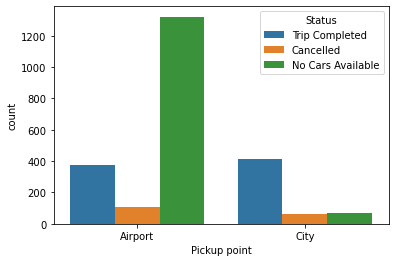

In [38]:
# Now we will visualised it

sns.countplot(data=Evening_Time,x="Pickup point",hue="Status")

In [39]:
Evening_Time["Status"].value_counts()

No Cars Available    1392
Trip Completed        784
Cancelled             166
Name: Status, dtype: int64

In [40]:
# Now we will find out status of all cab in the Evening slot

# PICKUP = City

status_evening_total=Evening_Time.loc[(Evening_Time["Pickup point"]=="City")]

len(status_evening_total)


#We Can do this way to

#Evening_Time[(Evening_Time["Pickup point"]=="City")].shape[0]

542

In [41]:
Evening_Time[(Evening_Time["Pickup point"]=="City")&(Evening_Time["Status"]=="Trip Completed")].shape[0]

411

In [42]:
Evening_Time[(Evening_Time["Pickup point"]=="City")&(Evening_Time["Status"]=="Cancelled")].shape[0]

60

In [43]:
Evening_Time[(Evening_Time["Pickup point"]=="City")&(Evening_Time["Status"]=="No Cars Available")].shape[0]

71

In [44]:
# Now we will find out status of all cab in the Evening slot

# PICKUP = City

status_evening_total=Evening_Time.loc[(Evening_Time["Pickup point"]=="Airport")]

len(status_evening_total)


#We Can do this way to

#Evening_Time[(Evening_Time["Pickup point"]=="Airport")].shape[0]

1800

In [45]:
Evening_Time[(Evening_Time["Pickup point"]=="Airport")&(Evening_Time["Status"]=="Trip Completed")].shape[0]

373

In [46]:
Evening_Time[(Evening_Time["Pickup point"]=="Airport")&(Evening_Time["Status"]=="Cancelled")].shape[0]

106

In [47]:
Evening_Time[(Evening_Time["Pickup point"]=="Airport")&(Evening_Time["Status"]=="No Cars Available")].shape[0]

1321

In [48]:
# Now its time for Pie Chart


Morning_Time_City=df[(df["Pickup point"]=="City")&(df["Time Slot"]=="Morning")]

In [49]:
Morning_Time_City_Count=pd.DataFrame(Morning_Time_City["Status"].value_counts())

In [50]:
Morning_Time_City_Count

,Status
Cancelled,820
Trip Completed,472
No Cars Available,385


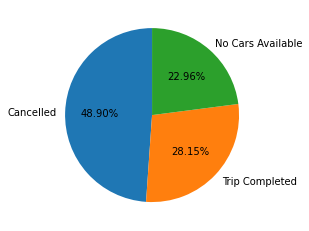

In [51]:
fig,ax=plt.subplots()
ax.pie(Morning_Time_City_Count["Status"].values,labels=Morning_Time_City_Count["Status"].index,
      autopct="%.2f%%",startangle=90)
plt.show()

In [52]:
Evening_Time_City=df[(df["Pickup point"]=="Airport")&(df["Time Slot"]=="Evening")]

In [53]:
Evening_Time_City_Count=pd.DataFrame(Evening_Time_City["Status"].value_counts())

In [54]:
Evening_Time_City_Count

,Status
No Cars Available,1321
Trip Completed,373
Cancelled,106


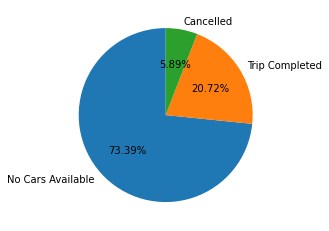

In [55]:
fig,ax=plt.subplots()
ax.pie(Evening_Time_City_Count["Status"].values,labels=Evening_Time_City_Count["Status"].index,
      autopct="%.2f%%",startangle=90)
plt.show()

In [56]:
'''Key Take Aways
1) We understood the dataset with the number of user requests were done and the number of columns(6745,6) 
along with other facts such as number/percentage of NaNs in each columns and format of dataTime in the request and drop timestamp columns.

2) We standardised format of dataTime in the request and drop timestamp columns.

3) Figured a logical reason as to why the NaNs in Driver_id and drop timestamp columns should be ignored.

4) Extracted the day number and hour from the request timestamp column to perform a deeper analysis.

5) Between hours 5AM-9AM, the load on cabs are high with almost equal amount of trips getting completed and cancelled.

6) Between hours 5PM-9PM, the load on cabs are significantly high. Hence, there is mismatch between cab demand and availabilty.
Hence, we see more of "No cars Available Status".

7) Between hours 5AM-9AM, the users from city is significantly high.

8) Between hours 5PM-9PM, the users from Airport is significantly high.

9) The "Morning_Rush" and "Evening_Rush" are the hours with maximum load(i.e more number of users requesting cab services).

10) We also saw the load during "Morning_rush" and "Evening_Rush" from both pick-up points "City" and "Airport".

11) During the evening rush hour, we saw a significant number of No CARS AVAILABLE status for the trip bookings from "Airport".'''

'Key Take Aways\n1) We understood the dataset with the number of user requests were done and the number of columns(6745,6) \nalong with other facts such as number/percentage of NaNs in each columns and format of dataTime in the request and drop timestamp columns.\n\n2) We standardised format of dataTime in the request and drop timestamp columns.\n\n3) Figured a logical reason as to why the NaNs in Driver_id and drop timestamp columns should be ignored.\n\n4) Extracted the day number and hour from the request timestamp column to perform a deeper analysis.\n\n5) Between hours 5AM-9AM, the load on cabs are high with almost equal amount of trips getting completed and cancelled.\n\n6) Between hours 5PM-9PM, the load on cabs are significantly high. Hence, there is mismatch between cab demand and availabilty.\nHence, we see more of "No cars Available Status".\n\n7) Between hours 5AM-9AM, the users from city is significantly high.\n\n8) Between hours 5PM-9PM, the users from Airport is signific